# Conv Net on Media Eval 2015 Placing Task - Locale

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cs231n.classifiers.cnn import *
# from cs231n.data_utils import get_CIFAR10_data
from cs231n.gradient_check import eval_numerical_gradient_array, eval_numerical_gradient
from cs231n.layers import *
from cs231n.fast_layers import *
from cs231n.solver import Solver

# import own modules
import data_utils

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
# DATA_SET = '000_small'
# DATA_SET = '000_small_50by30'

DATA_BATCH = '000_small_'
DATA_SIZE = '50by30'

DATA_SET = DATA_BATCH + DATA_SIZE

X_input_filename = 'data_maps/' + DATA_SET + '/x_input.npy'
Y_output_filename = 'data_maps/' + DATA_SET + '/y_labels.npy'

In [3]:
X = data_utils.load_npy_file(X_input_filename)
Y = data_utils.load_npy_file(Y_output_filename)
print 'X: {}'.format(X.shape)
print 'Y: {}'.format(Y.shape)
print 'Y sample ', Y[:10]

X: (1880, 30, 50, 3)
Y: (1880,)
Y sample  [0 1 1 2 3 2 4 1 0 2]


In [4]:
num_samples, H, W, C = X.shape

# swap C and H axes --> expected input
X = np.swapaxes(X, 1, 3)  # (num_samples, C, W, H)

NUM_CLASSES = 5

In [5]:
#Splitting into train, val, test sets

num_train = int(num_samples * 0.8)
num_val = int(num_samples * 0.1)
num_test = num_samples - num_train - num_val

print 'num_train: %d, num_val: %d, num_test: %d' % (num_train, num_val, num_test)

X_train = X[:num_train]
X_val = X[num_train:num_train+num_val]
X_test = X[num_train+num_val:]

Y_train = Y[:num_train]
Y_val = Y[num_train:num_train+num_val]
Y_test = Y[num_train+num_val:]

print 'X_train %s, X_val %s, X_test %s' % (X_train.shape, X_val.shape, X_test.shape)
print 'Y_train %s, Y_val %s, Y_test %s' % (Y_train.shape, Y_val.shape, Y_test.shape)


num_train: 1504, num_val: 188, num_test: 188
X_train (1504, 3, 50, 30), X_val (188, 3, 50, 30), X_test (188, 3, 50, 30)
Y_train (1504,), Y_val (188,), Y_test (188,)


## Overfit Small Data

1) Train model to overfit on subset of data

In [7]:
# Hyperparams
LEARN_RATE = 1e-4
WEIGHT_SCALE = 1e-2
NUM_EPOCHS = 20
BATCH_SIZE = 50

In [15]:
num_train = 100
small_data = {
  'X_train': X_train[:num_train],
  'y_train': Y_train[:num_train],
  'X_val': X_val[:num_train],
  'y_val': Y_val[:num_train],
}

model = ThreeLayerConvNet(input_dim = (C, W, H), num_classes = 5, weight_scale=WEIGHT_SCALE)

solver = Solver(model, small_data,
                num_epochs=NUM_EPOCHS, batch_size=BATCH_SIZE,
                update_rule='adam',
                optim_config={
                  'learning_rate': LEARN_RATE,
                },
                verbose=True, print_every=1)
solver.train()

(Iteration 1 / 40) loss: 1.743334
(Epoch 0 / 20) train acc: 0.160000; val_acc: 0.130000
(Iteration 2 / 40) loss: 7.776009
(Epoch 1 / 20) train acc: 0.250000; val_acc: 0.210000
(Iteration 3 / 40) loss: 3.624230
(Iteration 4 / 40) loss: 2.452432
(Epoch 2 / 20) train acc: 0.290000; val_acc: 0.180000
(Iteration 5 / 40) loss: 1.609621
(Iteration 6 / 40) loss: 1.475567
(Epoch 3 / 20) train acc: 0.320000; val_acc: 0.200000
(Iteration 7 / 40) loss: 1.588356
(Iteration 8 / 40) loss: 1.572171
(Epoch 4 / 20) train acc: 0.460000; val_acc: 0.190000
(Iteration 9 / 40) loss: 1.583663
(Iteration 10 / 40) loss: 1.540241
(Epoch 5 / 20) train acc: 0.600000; val_acc: 0.190000
(Iteration 11 / 40) loss: 1.503018
(Iteration 12 / 40) loss: 1.467070
(Epoch 6 / 20) train acc: 0.530000; val_acc: 0.200000
(Iteration 13 / 40) loss: 1.419516
(Iteration 14 / 40) loss: 1.242782
(Epoch 7 / 20) train acc: 0.480000; val_acc: 0.220000
(Iteration 15 / 40) loss: 1.286328
(Iteration 16 / 40) loss: 1.306848
(Epoch 8 / 20) tr

2) Plot to show overfitting loss and accuracy

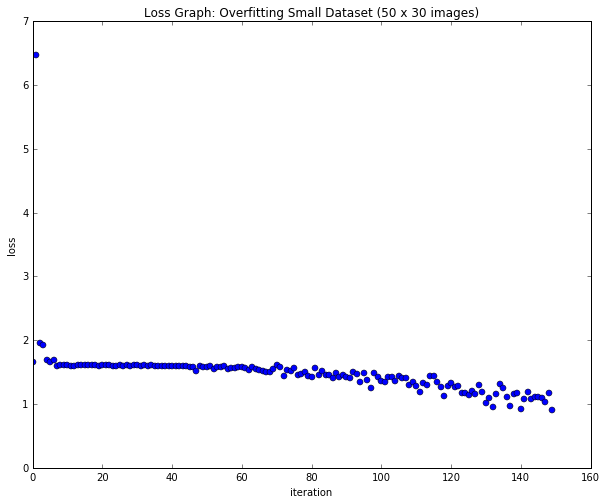

In [24]:
plt.plot(solver.loss_history, 'o')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('Loss Graph: Overfitting Small Dataset (50 x 30 images)')

plt.show()

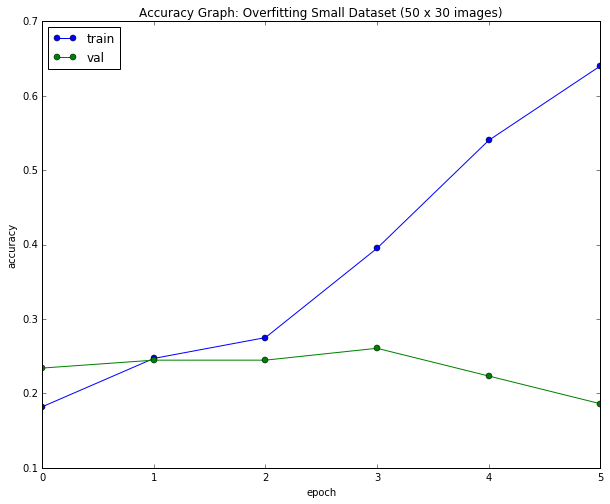

NameError: name 'LEARN_RATE' is not defined

In [32]:
plt.plot(solver.train_acc_history, '-o')
plt.plot(solver.val_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy Graph: Overfitting Small Dataset (50 x 30 images)')

plt.show()

## Train on full dataset

Train

In [18]:
# Hyperparams
LEARN_RATE = 1e-4
WEIGHT_SCALE = 1e-2
NUM_EPOCHS = 15
BATCH_SIZE = 50

In [ ]:
full_data = {
  'X_train': X_train,
  'y_train': Y_train,
  'X_val': X_val,
  'y_val': Y_val,
}

model = ThreeLayerConvNet(input_dim = (C, W, H), num_classes = 5, weight_scale=WEIGHT_SCALE)

solver = Solver(model, full_data,
                num_epochs=NUM_EPOCHS, batch_size=BATCH_SIZE,
                update_rule='adam',
                optim_config={
                  'learning_rate': LEARN_RATE,
                },
                verbose=True, print_every=1)
solver.train()

(Iteration 1 / 450) loss: 1.633684
(Epoch 0 / 15) train acc: 0.227000; val_acc: 0.228723
(Iteration 2 / 450) loss: 2.888497
(Iteration 3 / 450) loss: 3.798239
(Iteration 4 / 450) loss: 2.351192
(Iteration 5 / 450) loss: 1.689088
(Iteration 6 / 450) loss: 1.652010
(Iteration 7 / 450) loss: 1.622788
(Iteration 8 / 450) loss: 1.606364
(Iteration 9 / 450) loss: 1.610258
(Iteration 10 / 450) loss: 1.607934
(Iteration 11 / 450) loss: 1.615423
(Iteration 12 / 450) loss: 1.613133
(Iteration 13 / 450) loss: 1.611049
(Iteration 14 / 450) loss: 1.609255
(Iteration 15 / 450) loss: 1.603748
(Iteration 16 / 450) loss: 1.608046
(Iteration 17 / 450) loss: 1.607002
(Iteration 18 / 450) loss: 1.606150
(Iteration 19 / 450) loss: 1.605246
(Iteration 20 / 450) loss: 1.603903
(Iteration 21 / 450) loss: 1.609139
(Iteration 22 / 450) loss: 1.604403
(Iteration 23 / 450) loss: 1.607873
(Iteration 24 / 450) loss: 1.607130
(Iteration 25 / 450) loss: 1.598488
(Iteration 26 / 450) loss: 1.607517
(Iteration 27 / 450

Plot

In [ ]:
plt.plot(solver.loss_history, 'o')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('Loss Graph: Small dataset')

fname = 'plots/loss_%s_lr_%.4f_weight_%.4f_epochs_%d_batch_%d.jpg' % (DATA_BATCH+DATA_SIZE, LEARN_RATE, WEIGHT_SCALE, NUM_EPOCHS, BATCH_SIZE)
plt.savefig(fname)

plt.show()



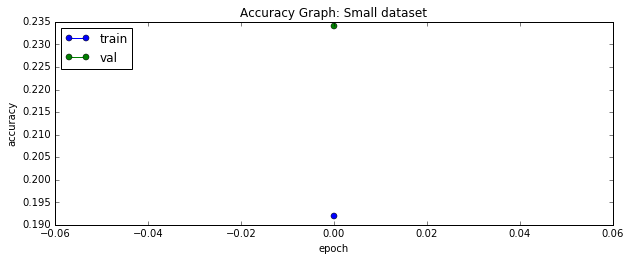

In [17]:
plt.plot(solver.train_acc_history, '-o')
plt.plot(solver.val_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy Graph: Small dataset')


fname = 'plots/accuracy_%s_lr_%.4f_weight_%.4f_epochs_%d_batch_%d.jpg' % (DATA_BATCH+DATA_SIZE, LEARN_RATE, WEIGHT_SCALE, NUM_EPOCHS, BATCH_SIZE)

plt.savefig(fname)

plt.show()
